<a href="https://colab.research.google.com/github/River-RS/credit-fraud/blob/mubeena/Shared_Project_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn



In [ ]:
!mkdir datasets

mkdir: cannot create directory ‘datasets’: File exists


In [ ]:
#Drop the 2 zip files to upload the unzip thru
!unzip "/content/australianCCdata.zip" -d datasets
!unzip "/content/creditcard.csv.zip" -d datasets

Archive:  /content/australianCCdata.zip
replace datasets/australian.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/australian.doc? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace datasets/Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  /content/creditcard.csv.zip
replace datasets/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
#importing dataset2
data2 = pd.read_csv('/content/datasets/creditcard.csv')

#Exploring data
print(data2.columns)

data2.shape

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


(284807, 31)

In [ ]:
print(data2.head())


   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


In [ ]:
#Drop Time coloumn
data2.drop('Time', axis = 1, inplace = True)

print(data2.head())

         V1        V2        V3        V4  ...       V27       V28  Amount  Class
0 -1.359807 -0.072781  2.536347  1.378155  ...  0.133558 -0.021053  149.62      0
1  1.191857  0.266151  0.166480  0.448154  ... -0.008983  0.014724    2.69      0
2 -1.358354 -1.340163  1.773209  0.379780  ... -0.055353 -0.059752  378.66      0
3 -0.966272 -0.185226  1.792993 -0.863291  ...  0.062723  0.061458  123.50      0
4 -1.158233  0.877737  1.548718  0.403034  ...  0.219422  0.215153   69.99      0

[5 rows x 30 columns]


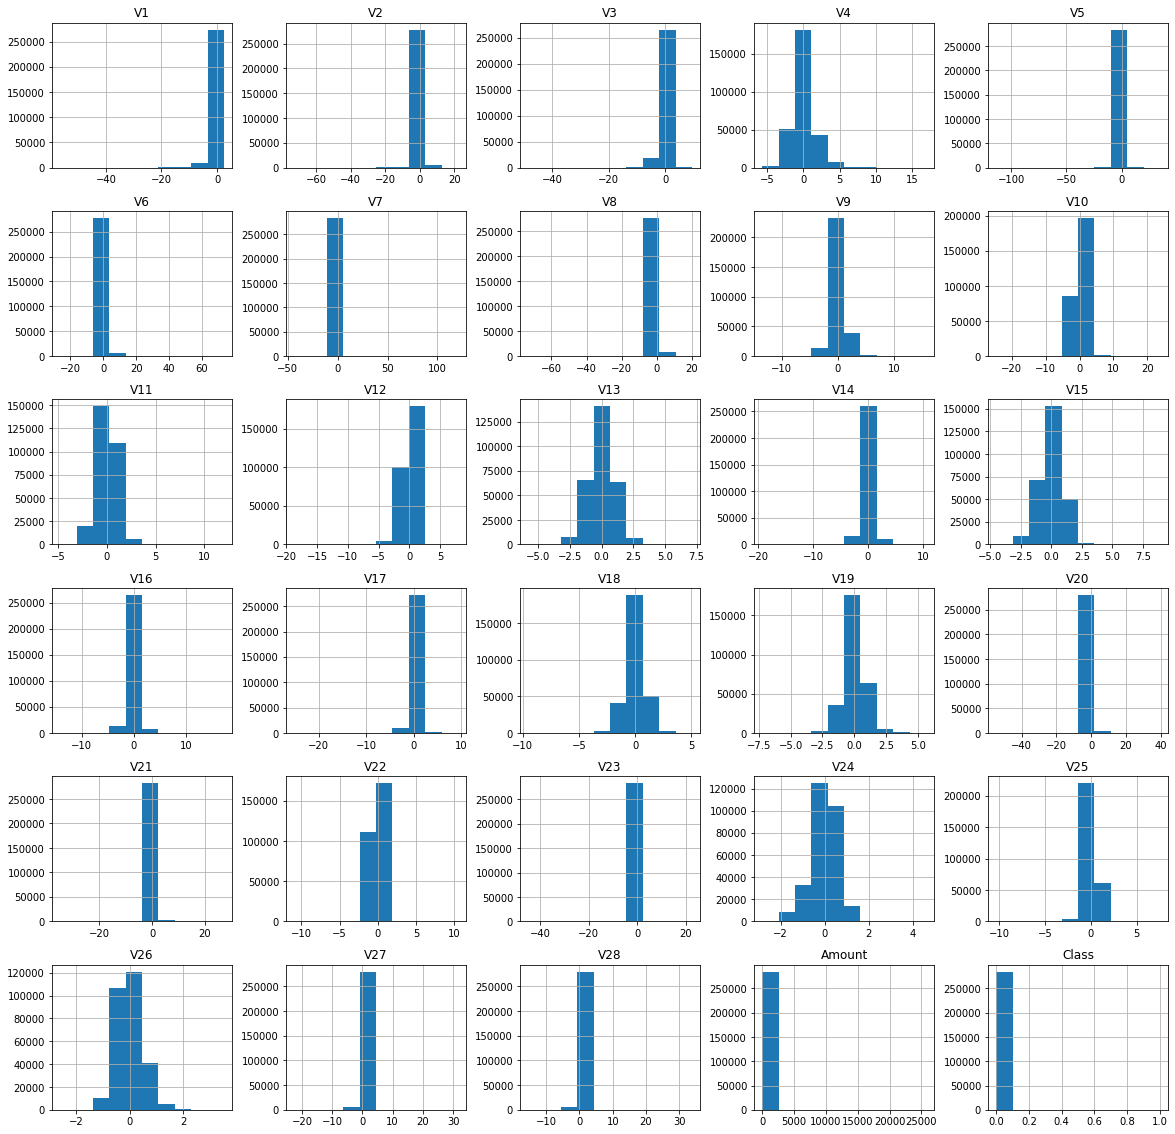

In [ ]:
# plot histogram of each parameter
data2.hist(figsize = (20, 20))
plt.show()

In [ ]:
cases = len(data2)
nonfraud_cases = len(data2[data2.Class == 0])
fraud_cases = len(data2[data2.Class == 1])
fraud_percentage = round(fraud_cases/nonfraud_cases*100, 2)
outlier_fraction = fraud_cases / float(cases)

from termcolor import colored as cl # text customization
print(cl('CASE COUNT', attrs = ['bold']))

print('-----------------------------------')
print('Total number of cases: {}'.format(cases))
print('Number of Non-fraud cases: {}'.format(nonfraud_cases))
print('Number of Fraud cases: {}'.format(fraud_cases))
print('Percentage of fraud cases: {}'.format(fraud_percentage))
print('------------------------------------')

print('Outlier: {}'.format(outlier_fraction))
print('------------------------------------')




CASE COUNT
-----------------------------------
Total number of cases: 284807
Number of Non-fraud cases: 284315
Number of Fraud cases: 492
Percentage of fraud cases: 0.17
------------------------------------
Outlier: 0.001727485630620034
------------------------------------


In [ ]:
#Data split to Test and Train
from sklearn.model_selection import train_test_split # data split

X = data2.drop('Class', axis = 1).values # X includes everything except our class column
Y = data2['Class'].values # Y includes all the class labels for each sample

#Splitting dataset into 20% test and 80% train
# random_state helps assure that you always get the same output when you split the data, helps create reproducible results 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('Y_train samples : ', attrs = ['bold']), Y_train[0:20])
print(cl('Y_test samples : ', attrs = ['bold']), Y_test[0:20])

In [ ]:
from sklearn.preprocessing import StandardScaler # data normalization
sc = StandardScaler()
amount = data2['Amount'].values

data2['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(data2['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [ ]:
# Applying Classification Algorithms
# 1. Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, Y_train)
tree_Yhat = tree_model.predict(X_test)




In [ ]:
# 2. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

n = 10

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, Y_train)
knn_Yhat = knn.predict(X_test)


In [7]:
# 3. Logistic Regression
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_Yhat = lr.predict(X_test)


NameError: ignored

In [ ]:
# 4. SVM
from sklearn.svm import SVC 

svm = SVC()
svm.fit(X_train, Y_train)
svm_Yhat = svm.predict(X_test)

Calculate Evaluation metric for each implemented Classification model

In [ ]:
# Accuracy score = No.of correct predictions / Total no.of predictions
print(cl('ACCURACY SCORE', attrs = ['bold']))
print('--------------------------------------------------------------')
print('KNN model accuracy is {}'.format(accuracy_score(Y_test, knn_Yhat))
print('Logistic Regression model  accuracy is {}'.format(accuracy_score(Y_test, lr_Yhat)),)
print('SVM model accuracy is {}'.format(accuracy_score(Y_test, svm_Yhat))

In [ ]:
# F1 score = 2( (precision * recall) / (precision + recall) )
print(cl('F1 SCORE', attrs = ['bold']))
print('--------------------------------------------------------------')
print('KNN model accuracy is {}'.format(f1_score(Y_test, knn_Yhat))
print('Logistic Regression model  accuracy is {}'.format(f1_score(Y_test, lr_Yhat)),)
print('SVM model accuracy is {}'.format(f1_score(Y_test, svm_Yhat))


In [ ]:
#Confusion matrix

##########Things to do for Stage2##############
1. implement confusion matrix for dataset2 above.
2. follow same procedure for unlabelled dataset (dataset1: australian)
3. Compare the Evaluation metric for both the data sets. 



# For Dataset1 (australianCCdata)

In [ ]:
#Convert .dat file to .csv
with open("/content/datasets/australian.dat") as f:
    with open("data1.csv", "w") as f1:
        for line in f:
            f1.write(line)

In [ ]:
data1 = pd.read_csv('/content/data1.csv')
#Exploring data
print(data1.columns)



Index(['1 22.08 11.46 2 4 4 1.585 0 0 0 1 2 100 1213 0'], dtype='object')


In [ ]:
data1.shape

(689, 1)

In [ ]:
print(data1.head())

  1 22.08 11.46 2 4 4 1.585 0 0 0 1 2 100 1213 0
0        0 22.67 7 2 8 4 0.165 0 0 0 0 2 160 1 0
1      0 29.58 1.75 1 4 4 1.25 0 0 0 1 2 280 1 0
2          0 21.67 11.5 1 5 3 0 1 1 11 1 2 0 1 1
3    1 20.17 8.17 2 6 4 1.96 1 1 14 0 2 60 159 1
4      0 15.83 0.585 2 8 8 1.5 1 1 2 0 2 100 1 1


In [ ]:
print(len(data1.columns))


1


In [ ]:
# pandas package is required
import pandas as pd
 
# converting csv file to data frame
data_frame = pd.read_csv("test.txt", sep='\t', names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16',])
 
 
# printing data frame
print("Data frame")
print(data_frame)
 
# printing row header
print("Row header")
print(list(data_frame.columns))

Data frame
Empty DataFrame
Columns: [A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, A15, A16]
Index: []
Row header
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']


In [ ]:
# pandas package is required
import pandas as pd
 
# declaring a data frame  with three rowsand three columns
data1 = pd.read_csv("test.txt")
 
# printing data frame
print("Original Data frame")
print(data1)
 
# adding column names
data1_new = pd.read_csv("test.txt", names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])
print("New Data frame")
print(data1_new)
 
# printing row header
print("Row header")
print(list(data1.columns))

EmptyDataError: ignored